#**Comparing KNN and Random Forest through AUC-ROC**<br>
---
Source Dataset [link](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data)
<br>Question: Which is better KNN or Random Forest through AUC-ROC for this dataset?<br>
<br>Made by Vincent Angkasa<br>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import json
import keras
import math
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.base import clone
from sklearn import tree, metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier)
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import collections, numpy

link = "https://drive.google.com/uc?export=download&id=1npBs_YIg5GPsQfJV4j3MQRxZHSbQG6Nf"

data = pd.read_csv(link)
df = data.copy()
del df['Unnamed: 32']
del df['id']

le = preprocessing.LabelEncoder()
df['diagnosis'] = le.fit_transform(df.diagnosis.values)

X_train, X_test, y_train, y_test = train_test_split(
                       df.iloc[:, 1:], df['diagnosis'], 
                       test_size=0.25, random_state=42)

randomforest = RandomForestClassifier(random_state=0)
randomforest.fit(X_train, y_train)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [2]:
y_pred = randomforest.predict(X_test)
asd = accuracy_score(y_test, y_pred)
asd = asd * 100
asd = "{:.2f}".format(asd)

y_pred = knn.predict(X_test)
asd1 = accuracy_score(y_test, y_pred)
asd1 = asd1 * 100
asd1 = "{:.2f}".format(asd1)


print(f"Random Forest Accuracy = {asd}%\nKNN Accuracy = {asd1}%")

Random Forest Accuracy = 97.20%
KNN Accuracy = 96.50%


In [3]:
y_pred1 = randomforest.predict_proba(X_test)[:,1]
y_pred2 = knn.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_pred1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_pred2)
auc1 = roc_auc_score(y_test, y_pred1)
auc2 = roc_auc_score(y_test, y_pred2)
print('roc_auc_score for Random Forest: ', roc_auc_score(y_test, y_pred1))
print('roc_auc_score for KNN: ', roc_auc_score(y_test, y_pred2))

roc_auc_score for Random Forest:  0.995110278818144
roc_auc_score for KNN:  0.9959425717852685


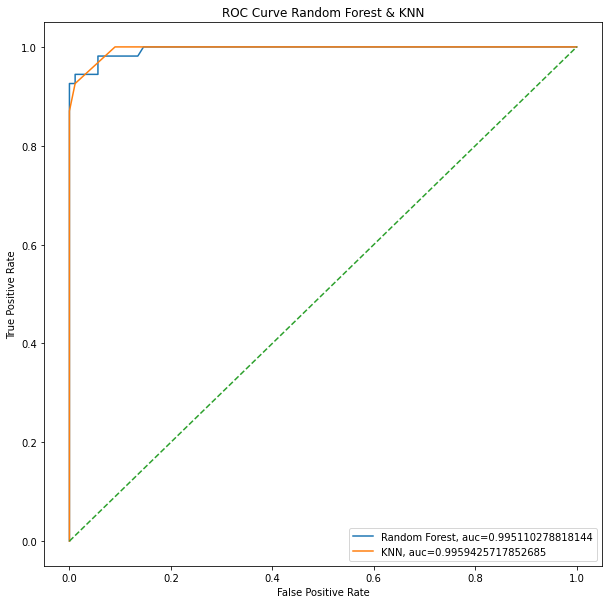

In [4]:
plt.subplots(1, figsize=(10,10))
plt.title('ROC Curve Random Forest & KNN')
plt.plot(false_positive_rate1, true_positive_rate1, label="Random Forest, auc="+str(auc1))
plt.plot(false_positive_rate2, true_positive_rate2, label="KNN, auc="+str(auc2))
plt.plot([0, 1], ls="--")
plt.legend(loc=4)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##**Result:**<br>
KNN wins by a very small margin.<br>
Through the curve we can conclude KNN is more stable and more desire curve.
<br>From the AUC as well, KNN wins by small margin.
<br>Through the accuracy score, Random Forest wins but for this case the indicator is using ROC so KNN wins.
<br>There are several reasons why KNN wins with ROC-AUC and Random Forest beats KNN with accuracy score.<br><br>
One of simple explanation is that ROC-AUC measures accuracy with different threshold and Random Forest with 100 trees while the KNN here uses n = 5. That is why KNN's ROC is smoother than Random Forest for this case.<br><br>
The result isn't that significant to say that Random Forest isn't doing its job compare to KNN.<br>
Certainly both are great for practical prediction. Because of the very small margin.
<br><br>
##**Conclusion:**
A lot of things to consider when choosing algorithim if solely based on ROC-AUC only for the dataset, KNN wins.<br>---------------------------------------

#**Further Analysis / Additional Info**

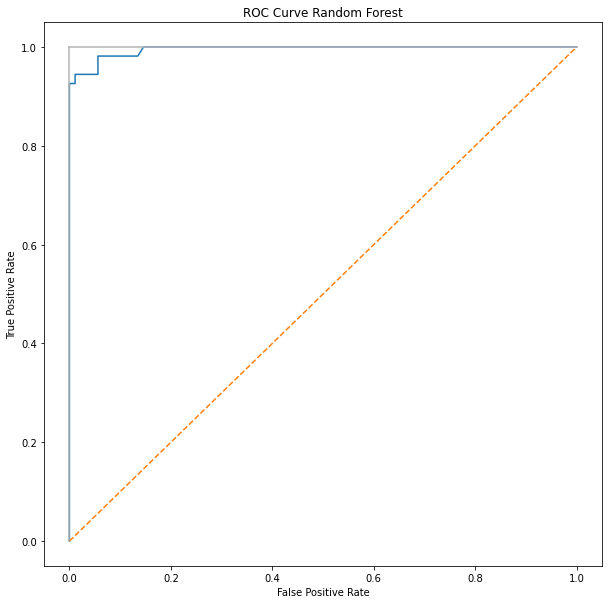

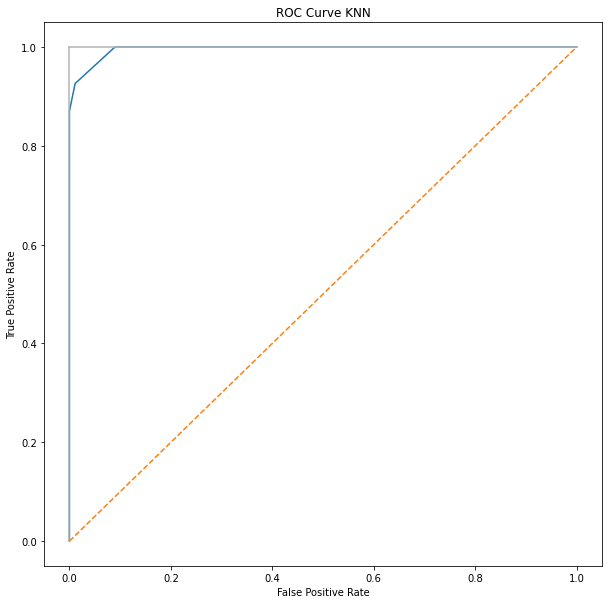

In [5]:
plt.subplots(1, figsize=(10,10))
plt.title('ROC Curve Random Forest')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplots(1, figsize=(10,10))
plt.title('ROC Curve KNN')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The first curve is for Random Forest and second curve for KNN.<br>The purpose of this to indicate KNN have smoother curve.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

The info for the raw data. 

In [9]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


First 5 of raw data.

In [13]:
print("Random Forest")
print("No.   TPR     FPR    Thres")
for x in range(len(true_positive_rate1)):
  print(
        str(x + 1).zfill(2), 
        " ", 
        format(true_positive_rate1[x], ".3f"), 
        " ", 
        format(false_positive_rate1[x], ".3f"),
        " ", 
        format(threshold1[x], ".3f"),
        )

Random Forest
No.   TPR     FPR    Thres
01   0.000   0.000   2.000
02   0.574   0.000   1.000
03   0.667   0.000   0.990
04   0.722   0.000   0.980
05   0.741   0.000   0.970
06   0.852   0.000   0.910
07   0.926   0.000   0.780
08   0.926   0.011   0.710
09   0.944   0.011   0.680
10   0.944   0.022   0.440
11   0.944   0.045   0.380
12   0.944   0.056   0.350
13   0.981   0.056   0.310
14   0.981   0.079   0.290
15   0.981   0.101   0.280
16   0.981   0.112   0.240
17   0.981   0.135   0.210
18   1.000   0.146   0.190
19   1.000   0.202   0.100
20   1.000   0.225   0.090
21   1.000   0.270   0.080
22   1.000   0.337   0.050
23   1.000   0.393   0.040
24   1.000   0.416   0.030
25   1.000   0.506   0.020
26   1.000   0.652   0.010
27   1.000   1.000   0.000


Different threshold for the Random Forest AUC-ROC.<br>It shows why the curve isn't smooth.

In [14]:
print("\nKNN")
print("No.   TPR     FPR")
for x in range(len(true_positive_rate2)):
  print(str(x + 1).zfill(2), " ", format(true_positive_rate2[x], ".3f"), " ", format(false_positive_rate2[x], ".3f"))


KNN
No.   TPR     FPR
01   0.000   0.000
02   0.796   0.000
03   0.870   0.000
04   0.926   0.011
05   1.000   0.090
06   1.000   0.169
07   1.000   1.000


Different threshold for the KNN AUC-ROC.

In [15]:
a = numpy.array(y_pred1)
collections.Counter(a)

Counter({0.0: 31,
         0.01: 13,
         0.02: 8,
         0.03: 2,
         0.04: 5,
         0.05: 2,
         0.06: 2,
         0.07: 2,
         0.08: 4,
         0.09: 2,
         0.1: 1,
         0.12: 1,
         0.13: 1,
         0.16: 1,
         0.17: 1,
         0.19: 2,
         0.21: 2,
         0.24: 1,
         0.28: 2,
         0.29: 1,
         0.3: 1,
         0.31: 1,
         0.33: 1,
         0.35: 1,
         0.38: 2,
         0.44: 1,
         0.68: 1,
         0.71: 1,
         0.78: 1,
         0.83: 1,
         0.87: 1,
         0.88: 1,
         0.91: 2,
         0.92: 2,
         0.95: 2,
         0.97: 1,
         0.98: 3,
         0.99: 5,
         1.0: 31})

The result of prediction from Random Forest.

In [16]:
a = numpy.array(y_pred2)
collections.Counter(a)

Counter({0.0: 74, 0.2: 7, 0.4: 11, 0.6: 4, 0.8: 4, 1.0: 43})

The result of prediction from KNN.